<a href="https://colab.research.google.com/github/AbenezerYBekele/data-analyst/blob/main/medicaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
df = pd.read_csv('Medicaid_coverage_2025.csv')
df.head()

,TOPIC,SUBTOPIC,SUBTOPIC_ID,CLASSIFICATION,CLASSIFICATION_ID,GROUP,GROUP_ID,GROUP_ORDER,SUBGROUP,SUBGROUP_ID,SUBGROUP_ORDER,ESTIMATE_TYPE,ESTIMATE_TYPE_ID,TIME_PERIOD,TIME_PERIOD_ID,ESTIMATE,STANDARD_ERROR,ESTIMATE_UCI,ESTIMATE_LCI,FLAG,FOOTNOTE_ID_LIST
0,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1984,1,6.8,0.3,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
1,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1989,2,7.2,0.2,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
2,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1994,3,11.2,0.3,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
3,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1995,4,11.5,0.3,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
4,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1997,5,9.7,0.2,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"


Explore the Data

In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.rename(columns={'State Code': 'State', 'Coverage %': 'Coverage_Percentage'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TOPIC              1944 non-null   object 
 1   SUBTOPIC           0 non-null      float64
 2   SUBTOPIC_ID        0 non-null      float64
 3   CLASSIFICATION     1944 non-null   object 
 4   CLASSIFICATION_ID  1944 non-null   int64  
 5   GROUP              1944 non-null   object 
 6   GROUP_ID           1944 non-null   int64  
 7   GROUP_ORDER        1944 non-null   int64  
 8   SUBGROUP           1944 non-null   object 
 9   SUBGROUP_ID        1944 non-null   float64
 10  SUBGROUP_ORDER     1944 non-null   int64  
 11  ESTIMATE_TYPE      1944 non-null   object 
 12  ESTIMATE_TYPE_ID   1944 non-null   int64  
 13  TIME_PERIOD        1944 non-null   int64  
 14  TIME_PERIOD_ID     1944 non-null   int64  
 15  ESTIMATE           1833 non-null   float64
 16  STANDARD_ERROR     1806 

Check Unique Values in Key Columns

In [ ]:
print("TOPIC:", df['TOPIC'].unique())
print("SUBTOPIC:", df['SUBTOPIC'].unique())
print("TIME_PERIOD:", df['TIME_PERIOD'].unique())
print("CLASSIFICATION:", df['CLASSIFICATION'].unique())
print("SUBGROUP:", df['SUBGROUP'].unique())

TOPIC: ['Medicaid coverage among people younger than 65 years']
SUBTOPIC: [nan]
TIME_PERIOD: [1984 1989 1994 1995 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
CLASSIFICATION: ['Total' 'Demographic Characteristic' 'Geographic Characteristic'
 'Multiple Characteristics']
SUBGROUP: ['Younger than 65 years' 'Younger than 18 years' 'Younger than 6 years'
 '6-17 years' '18-64 years' '18-44 years' '18-24 years' '25-34 years'
 '35-44 years' '45-64 years' '45-54 years' '55-64 years'
 'Younger than 19 years' '6-18 years' '19-25 years' 'No difficulty'
 'Some difficulty' 'A lot of difficulty or cannot do at all'
 'American Indian and Alaska Native only' 'Asian only'
 'Asian or Pacific Islander only' 'Black only'
 'Native Hawaiian or Other Pacific Islander only' 'White only'
 'Two or more races' 'All races, Hispanic' 'All races, Hispanic, Cuban'
 'All races, Hispanic, Mexican' 'All races, Hispanic, Puerto Rican'
 'All races, Hi

Filter and Pivot the Data

In [ ]:
filtered_df = df[['TIME_PERIOD', 'CLASSIFICATION', 'ESTIMATE']]

filtered_df = filtered_df.dropna(subset=['ESTIMATE'])

pivot_df = filtered_df.pivot_table(index='TIME_PERIOD', columns='CLASSIFICATION', values='ESTIMATE', aggfunc='mean')

pivot_df.head()


CLASSIFICATION,Demographic Characteristic,Geographic Characteristic,Multiple Characteristics,Total
TIME_PERIOD,,,,
1984,9.860714,6.883333,9.450000,10.40
1989,10.217857,7.350000,10.590000,11.30
1994,14.678571,11.200000,15.380000,18.45
1995,14.885714,11.666667,17.917857,19.05
1997,12.535714,9.983333,15.096667,16.30


Plot the Trends

<Figure size 1200x600 with 0 Axes>

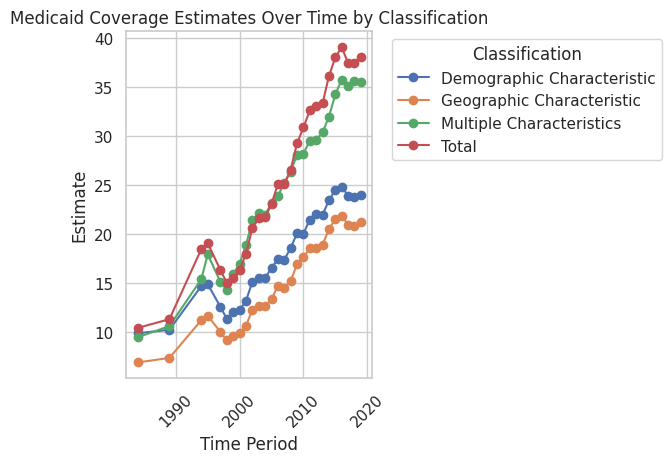

In [ ]:
plt.figure(figsize=(12, 6))
pivot_df.plot(marker='o')
plt.title('Medicaid Coverage Estimates Over Time by Classification')
plt.ylabel('Estimate')
plt.xlabel('Time Period')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top N Classifications by Average Estimate

<ipython-input-51-c91c0722da2a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_class.values, y=top_class.index, palette='Blues_d')


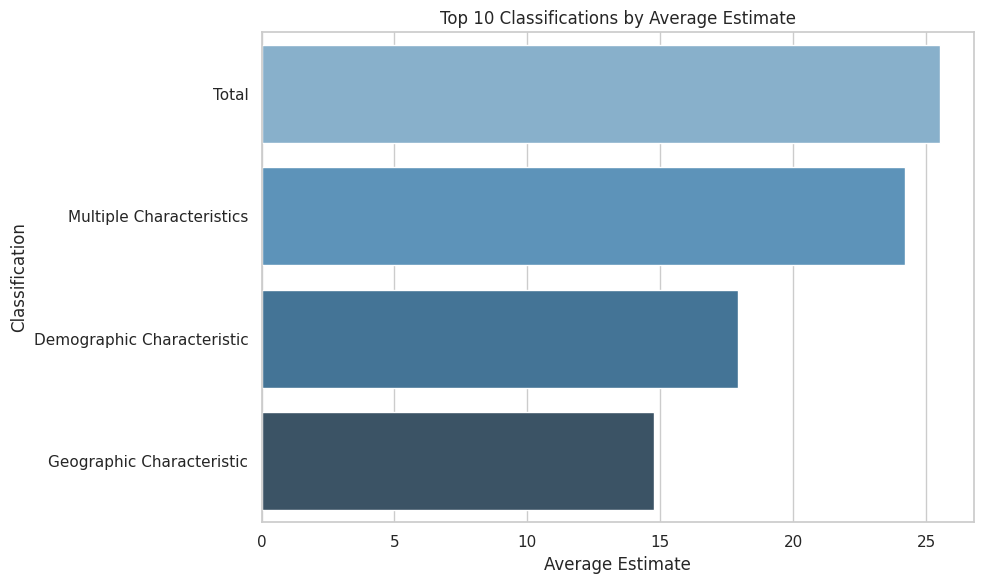

In [ ]:
top_class = df.groupby('CLASSIFICATION')['ESTIMATE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_class.values, y=top_class.index, palette='Blues_d')
plt.title('Top 10 Classifications by Average Estimate')
plt.xlabel('Average Estimate')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

Trend Over Time

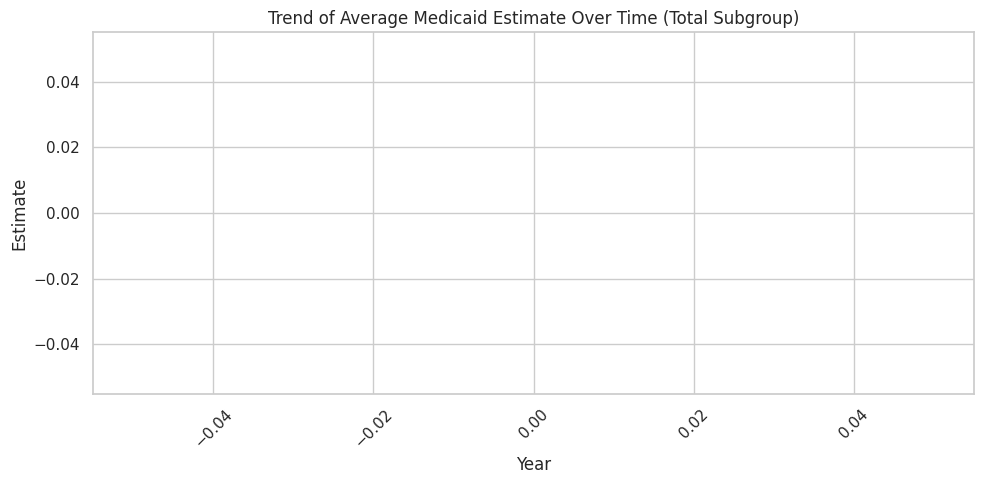

In [ ]:
trend_df = df[df['SUBGROUP'] == 'Total'].groupby('TIME_PERIOD')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df, x='TIME_PERIOD', y='ESTIMATE', marker='o')
plt.title('Trend of Average Medicaid Estimate Over Time (Total Subgroup)')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Classification vs Time

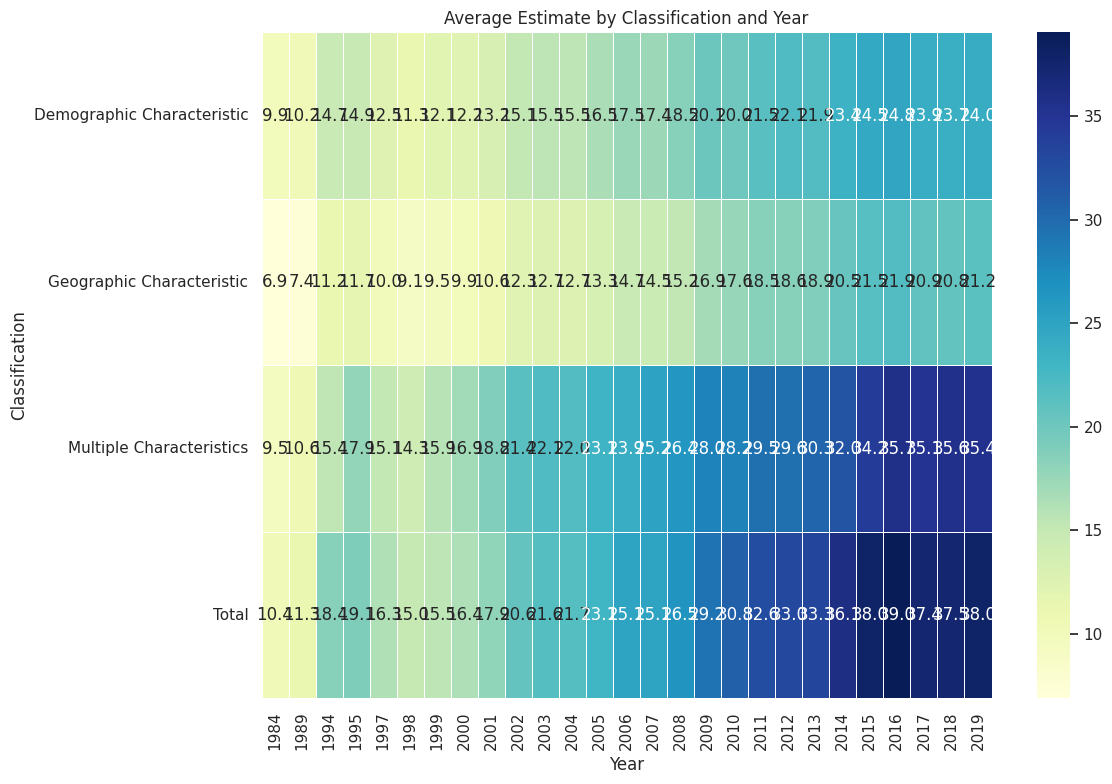

In [ ]:
heat_df = df.pivot_table(index='CLASSIFICATION', columns='TIME_PERIOD', values='ESTIMATE', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(heat_df, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Estimate by Classification and Year')
plt.ylabel('Classification')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

Custom Grouped Summary Table

In [ ]:
summary = df.groupby(['TIME_PERIOD', 'SUBGROUP'])['ESTIMATE'].agg(['mean', 'min', 'max', 'count']).reset_index()
summary.head()


,TIME_PERIOD,SUBGROUP,mean,min,max,count
0,1970,18-24 years,12.466667,6.4,19.7,27
1,1970,18-44 years,9.614815,5.1,16.0,27
2,1970,18-64 years,8.507407,4.5,14.1,27
3,1970,18-64 years: 100% to <134% FPL,20.770370,7.6,36.3,27
4,1970,18-64 years: 100% to <200% FPL,15.155556,4.5,29.1,27


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('SUBGROUP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TIME_PERIOD']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('TIME_PERIOD', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SUBGROUP')):
  _plot_series(series, series_name, i)
  fig.legend(title='SUBGROUP', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TIME_PERIOD')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TIME_PERIOD']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('TIME_PERIOD', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SUBGROUP')):
  _plot_series(series, series_name, i)
  fig.legend(title='SUBGROUP', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TIME_PERIOD')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TIME_PERIOD']
  ys = series['max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('TIME_PERIOD', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SUBGROUP')):
  _plot_series(series, series_name, i)
  fig.legend(title='SUBGROUP', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TIME_PERIOD')
_ = plt.ylabel('max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TIME_PERIOD']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TIME_PERIOD'}, axis=1)
              .sort_values('TIME_PERIOD', ascending=True))
  xs = counted['TIME_PERIOD']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('TIME_PERIOD', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SUBGROUP')):
  _plot_series(series, series_name, i)
  fig.legend(title='SUBGROUP', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TIME_PERIOD')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['SUBGROUP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='mean', y='SUBGROUP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['SUBGROUP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='min', y='SUBGROUP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['SUBGROUP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='max', y='SUBGROUP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Save Cleaned & Processed Data

In [ ]:
df.to_csv('cleaned_medicaid_coverage.csv', index=False)

 Focus on One Group